In [1]:
import numpy as np
import tensorflow as tf
import torch

from tensorflow import keras
from tensorflow.keras import layers


  TensorFlow's `tf-nightly` package will soon be updated to TensorFlow 2.0.

  Please upgrade your code to TensorFlow 2.0:
    * https://www.tensorflow.org/beta/guide/migration_guide

  Or install the latest stable TensorFlow 1.X release:
    * `pip install -U "tensorflow==1.*"`

  Otherwise your code may be broken by the change.

  


In [2]:
def get_dataset(take_first=None):
    fashion_mnist = keras.datasets.fashion_mnist
    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

    train_images = train_images / 255.0
    test_images = test_images / 255.0

    if take_first is not None:
        train_images = train_images[:take_first, ...]
        train_labels = train_labels[:take_first, ...]
        
    train_images = np.expand_dims(train_images, -1)
    test_images = np.expand_dims(test_images, -1)
        
    return train_images, train_labels, test_images, test_labels

In [3]:
train_images, train_labels, test_images, test_labels = get_dataset()

In [4]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='valid', activation='relu',
                               input_shape=(28, 28, 1)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10, activation='softmax')
    ]
)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [5]:
model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

model.fit(train_images,
          train_labels,
          epochs=1)
model.summary()

Train on 60000 samples
60000/60000 [==============================] - 63s 1ms/sample - loss: 0.3927 - acc: 0.8620
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 27, 27, 64)        320       
_________________________________________________________________
flatten (Flatten)            (None, 46656)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                466570    
Total params: 466,890
Trainable params: 466,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
for layer in model.layers:
    for t in layer.get_weights():
        print(t.shape)

(2, 2, 1, 64)
(64,)
(46656, 10)
(10,)


In [7]:
# model.layers[0].set_weights([np.arange(256).reshape((2, 2, 1, 64)), np.zeros((64,))])
# model.layers[2].set_weights([np.arange(466560).reshape((46656, 10)), np.zeros((10,))])

In [8]:
for layer in model.layers:
    for t in layer.get_weights():
        print(t)

[[[[-0.2218845  -0.0224885  -0.10822162  0.02741042 -0.09047837
    -0.19396758 -0.4689103  -0.05382776 -0.20442352 -0.02387653
     0.18146923  0.11964928 -0.17290176  0.02376717 -0.14294565
    -0.03715644  0.17383613  0.15154147  0.00110463 -0.14075956
     0.09916581 -0.12216088  0.12706463  0.10706005 -0.01716574
    -0.16499479  0.10593317 -0.1370699  -0.42704728  0.24601454
     0.03077578 -0.0362257  -0.0815331  -0.2049468   0.02669733
    -0.13784203  0.0711825  -0.13861053 -0.23866913 -0.2085985
    -0.05202955 -0.649253   -0.28754953 -0.09385756  0.23388931
    -0.14731951 -0.01270101  0.14311872 -0.1519562  -0.00393118
    -0.5993038   0.076112   -0.00803654 -0.1765259  -0.2033413
    -0.02758358  0.21385299 -0.00233603 -0.11110564  0.08774997
     0.03253324  0.07106297 -0.20598009 -0.10711683]]

  [[ 0.21221769  0.06021606 -0.02660153 -0.00635358 -0.00686458
     0.19377324 -0.5343191   0.03299649  0.00485669  0.15309475
    -0.10432772  0.10648011 -0.03647205 -0.03472619

In [9]:
print('Evaluate source model')
test_loss, test_acc = model.evaluate(test_images,
                                     test_labels,
                                     verbose=0)
print('Test accuracy:', test_acc)

Evaluate source model
Test accuracy: 0.882


In [10]:
def to_tf_kernel_order(tensor):
    """Change conv.kernel axis order from PyTorch to Tensoflow.

    :param tensor: tensor with conv.kernel weights.
    :return: tensor with the Tensoflow-like exis order.
    []
    """
    return np.transpose(tensor, (2, 3, 1, 0))


def to_pytorch_kernel_order(tensor):
    """Change conv.kernel axis order from Tensoflow to PyTorch.

    :param tensor: tensor with conv.kernel weights.
    :return: tensor with the Pytorch-like exis order.
    []
    """
#     (out_channels, in_channels/groups, kernel_size[0],kernel_size[1])
    return np.transpose(tensor, (3, 2, 0, 1))
#     return tensor.T

In [11]:
import torch.nn as nn

In [19]:
torch_model = nn.Sequential(
                            nn.Conv2d(1, 64, kernel_size=2),
                            nn.ReLU(),
                            nn.Flatten(),
                            nn.Linear(46656, 10),
                            nn.Softmax(dim=1)
                           )

In [20]:
# for layer in torch_model:
#     print(layer.weight)

In [21]:
con1, conv1_bias, dense, dense_bias = *model.layers[0].get_weights(), *model.layers[-1].get_weights()

In [22]:
con1.shape

(2, 2, 1, 64)

In [48]:
# torch_model[0].weight.data = torch.arange(256).reshape((2, 2, 1, 64)).T.float()
# torch_model[0].bias.data = torch.zeros((64, )).float()

# torch_model[-2].weight.data = torch.arange(466560).reshape(46656, 10).T.float()
# torch_model[-2].bias.data = torch.zeros((10, )).float()
con1 = con1.astype(np.float32)
conv1_bias = conv1_bias.astype(np.float32)
dense = dense.astype(np.float32)
dense_bias = dense_bias.astype(np.float32)

print(con1.shape)
print(torch_model[0].weight.data.shape, torch_model[0].bias.data.shape)
print(torch_model[-2].weight.data.shape, torch_model[-2].bias.data.shape)

print("!!!!!!")
print(con1.shape)
con1 = np.transpose(np.asfortranarray(con1), (1, 0, 3, 2))
print(np.asfortranarray(con1).shape)
print("!!!!!")
torch_model[0].weight.data = torch.from_numpy(con1).float()
torch_model[0].bias.data = torch.from_numpy(conv1_bias).float()

torch_model[-2].weight.data = torch.from_numpy(dense.T).float()
torch_model[-2].bias.data = torch.from_numpy(dense_bias).float()

print(torch_model[0].weight.data.shape, torch_model[0].bias.data.shape)
print(torch_model[-2].weight.data.shape, torch_model[-2].bias.data.shape)

(1, 64, 2, 2)
torch.Size([1, 64, 2, 2]) torch.Size([64])
torch.Size([10, 46656]) torch.Size([10])
!!!!!!
(1, 64, 2, 2)
(64, 1, 2, 2)
!!!!!
torch.Size([64, 1, 2, 2]) torch.Size([64])
torch.Size([10, 46656]) torch.Size([10])


In [49]:
# [batch, h, w, c] -> [batch, c, h, w]
torch_test_images = np.transpose(test_images.astype(np.float32), (0, 3, 1, 2))

outputs = np.argmax(torch_model(torch.from_numpy(torch_test_images).float()).data.numpy(), 1)
tf_output = np.argmax(tf.keras.backend.get_value(model(test_images.astype(np.float32))), 1)

# _, predicted = torch.max(outputs, -1)
c = (outputs == test_labels).squeeze()

print("Accuracy:", np.sum(c.astype(np.int))/c.shape[0])

Accuracy: 0.1025


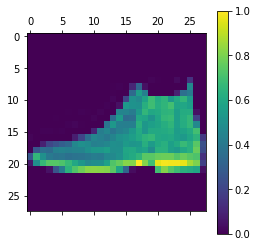

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt


plt.matshow(test_images[0, ...].reshape((28, 28)))
plt.colorbar()
plt.show()

In [45]:
torch_test_images = np.transpose(test_images.astype(np.float32), (0, 3, 1, 2))


tf_tensor = tf.keras.backend.get_value(model(test_images.astype(np.float32)))
torch_answer = torch_model(torch.from_numpy(torch_test_images).float()).data.numpy()
print(np.linalg.norm(tf_tensor-torch_answer))
print("================")

117.04451


In [46]:
torch_weight = torch_model[-2].weight.data
tf_weight = model.layers[-1].get_weights()[0]

In [37]:
np.linalg.norm(tf_weight - torch_weight.data.numpy().T)

0.0

In [22]:
torch_model[0].weight.data

tensor([[[[ 1.3624e-01, -3.0827e-01],
          [ 1.4382e-01, -2.8816e-01]]],


        [[[ 1.0105e-01,  4.5158e-02],
          [-1.8772e-01,  7.5066e-02]]],


        [[[ 1.6364e-01, -1.0101e-01],
          [ 1.0292e-01, -1.6350e-01]]],


        [[[-1.4686e-01, -1.0267e-01],
          [-5.0278e-02, -1.3119e-01]]],


        [[[ 2.0652e-01, -2.0435e-01],
          [ 2.7134e-02, -3.0395e-02]]],


        [[[-2.2994e-01, -1.5197e-01],
          [ 2.1304e-01,  1.7931e-01]]],


        [[[-1.4114e-01, -2.2194e-02],
          [-4.2855e-03, -1.4477e-01]]],


        [[[-5.2696e-02, -2.7087e-01],
          [ 2.0747e-01, -1.3171e-01]]],


        [[[-1.8758e-01,  2.0509e-01],
          [-1.4464e-01,  8.7711e-02]]],


        [[[ 1.2734e-01, -1.4082e-01],
          [-1.3208e-01,  1.3056e-01]]],


        [[[ 2.0464e-01,  5.6576e-02],
          [-1.9343e-01, -7.3850e-02]]],


        [[[ 9.3964e-02,  2.1954e-01],
          [-8.7126e-02, -2.1645e-01]]],


        [[[-6.1845e-01, -1.9489e-01],
  

In [23]:
model.layers[0].get_weights()[0].T

array([[[[ 1.36243150e-01, -3.08269858e-01],
         [ 1.43817693e-01, -2.88156897e-01]]],


       [[[ 1.01050586e-01,  4.51584645e-02],
         [-1.87723264e-01,  7.50656798e-02]]],


       [[[ 1.63637877e-01, -1.01009600e-01],
         [ 1.02916442e-01, -1.63501754e-01]]],


       [[[-1.46863401e-01, -1.02671355e-01],
         [-5.02784625e-02, -1.31186664e-01]]],


       [[[ 2.06517145e-01, -2.04348266e-01],
         [ 2.71340180e-02, -3.03953663e-02]]],


       [[[-2.29941636e-01, -1.51965946e-01],
         [ 2.13042155e-01,  1.79310977e-01]]],


       [[[-1.41136080e-01, -2.21936405e-02],
         [-4.28549945e-03, -1.44765630e-01]]],


       [[[-5.26960492e-02, -2.70868927e-01],
         [ 2.07473323e-01, -1.31708935e-01]]],


       [[[-1.87584296e-01,  2.05088183e-01],
         [-1.44639418e-01,  8.77112299e-02]]],


       [[[ 1.27339274e-01, -1.40818372e-01],
         [-1.32083356e-01,  1.30556002e-01]]],


       [[[ 2.04641894e-01,  5.65763935e-02],
         [-1.93

In [24]:
w_1 = torch.arange(256).reshape((2, 2, 1, 64)).float().data.numpy() 
w_2 = np.arange(256).reshape((2, 2, 1, 64))
